# Colab Section to import the dataset

In [ ]:
!pip install opendatasets
import opendatasets as od
import pandas

od.download(
    "https://www.kaggle.com/datasets/msambare/fer2013")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: assassingewp
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/msambare/fer2013


100%|██████████| 60.3M/60.3M [00:00<00:00, 184MB/s]


# Loading the Modules...

In [ ]:
# import system libs
import os
import time
import shutil
import pathlib
import itertools
from PIL import Image

# import data handling tools
import zipfile
import cv2
import numpy as np
import pandas as pd
from scipy.ndimage import median_filter
import seaborn as sns
sns.set_style('darkgrid')
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import OneHotEncoder ,LabelEncoder

# import Deep learning Libraries

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense,InputLayer, Activation, Dropout, BatchNormalization
from tensorflow.keras import regularizers
from keras.callbacks import EarlyStopping
from keras.regularizers import l2
from keras.utils import to_categorical
from tensorflow.keras.preprocessing import image

# Ignore Warnings
import warnings
warnings.filterwarnings("ignore")

print ('modules loaded!')

modules loaded!


# Loading the dataset and labeling it.

In [ ]:
dataset_path = 'fer2013/train'


data = []
labels = []
paths = []
for class_name in os.listdir(dataset_path):
    class_dir = os.path.join(dataset_path, class_name)
    for img_name in os.listdir(class_dir):
        img_path = os.path.join(class_dir, img_name)
        paths.append(img_path)
        img = cv2.imread(img_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        data.append(img)
        labels.append(class_name)

In [ ]:
dataset_path = 'fer2013/test'

for class_name in os.listdir(dataset_path):
    class_dir = os.path.join(dataset_path, class_name)
    for img_name in os.listdir(class_dir):
        img_path = os.path.join(class_dir, img_name)
        paths.append(img_path)
        img = cv2.imread(img_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        data.append(img)
        labels.append(class_name)


df = pd.DataFrame({'data': paths, 'label': labels})
data = np.array(data)
labels = np.array(labels)

In [ ]:
df

,data,label
0,fer2013/train/fear/Training_99136556.jpg,fear
1,fer2013/train/fear/Training_43355279.jpg,fear
2,fer2013/train/fear/Training_74441725.jpg,fear
3,fer2013/train/fear/Training_67600403.jpg,fear
4,fer2013/train/fear/Training_61305232.jpg,fear
...,...,...
35882,fer2013/test/surprise/PublicTest_7556977.jpg,surprise
35883,fer2013/test/surprise/PublicTest_66116810.jpg,surprise
35884,fer2013/test/surprise/PrivateTest_53530460.jpg,surprise
35885,fer2013/test/surprise/PublicTest_54464589.jpg,surprise


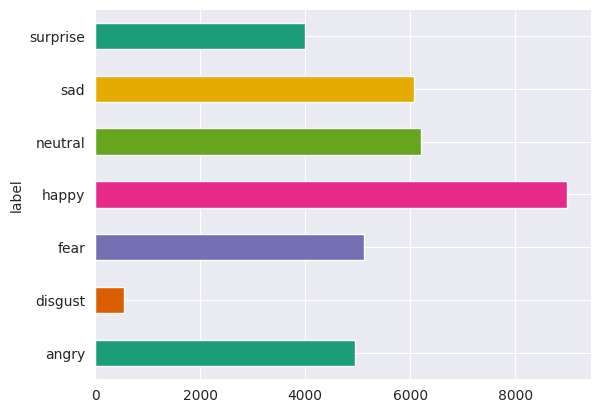

In [ ]:
# @title label
import seaborn as sns
df.groupby('label').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

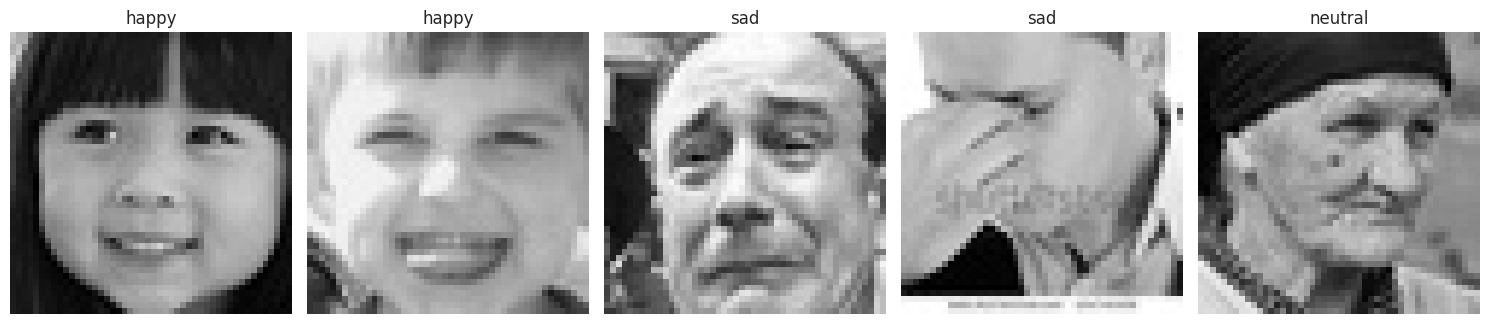

In [ ]:
def display_random_images(images, labels, num_images=5):
    num_total_images = len(images)
    random_indices = np.random.choice(num_total_images, size=num_images, replace=False)

    fig, axes = plt.subplots(1, num_images, figsize=(15, 5))
    for i, idx in enumerate(random_indices):
        axes[i].imshow(images[idx])
        axes[i].set_title(labels[idx])
        axes[i].axis('off')
    plt.tight_layout()
    plt.show()

display_random_images(data, labels)

In [ ]:
label_encoder = LabelEncoder()
labels = label_encoder.fit_transform(labels)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42 , stratify = labels)

In [ ]:
y_train = to_categorical(y_train, num_classes=7)  # Convert training labels to one-hot encoded format
y_test = to_categorical(y_test, num_classes=7)

In [ ]:
x_train = x_train / 255.0
x_test = x_test / 255.0

In [ ]:
print(type(x_train), x_train.shape)
print(type(y_train), y_train.shape)
print(type(x_test), x_test.shape)
print(type(y_test), y_test.shape)

print("x_train data type:", x_train.dtype)
print("y_train data type:", y_train.dtype)
print("x_test data type:", x_test.dtype)
print("y_test data type:", y_test.dtype)

<class 'numpy.ndarray'> (28709, 48, 48, 3)
<class 'numpy.ndarray'> (28709, 7)
<class 'numpy.ndarray'> (7178, 48, 48, 3)
<class 'numpy.ndarray'> (7178, 7)
x_train data type: float64
y_train data type: float32
x_test data type: float64
y_test data type: float32


# CNN 1

In [ ]:
cnn1_model = Sequential()

# Input layer (Caused a Headache in Testing)
cnn1_model.add(InputLayer(input_shape=(48, 48, 3)))


cnn1_model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
cnn1_model.add(BatchNormalization())
cnn1_model.add(MaxPooling2D(pool_size=(2, 2)))
cnn1_model.add(Dropout(0.25))

cnn1_model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
cnn1_model.add(BatchNormalization())
cnn1_model.add(MaxPooling2D(pool_size=(2, 2)))
cnn1_model.add(Dropout(0.25))


cnn1_model.add(Flatten())


cnn1_model.add(Dense(128, activation='relu'))
cnn1_model.add(BatchNormalization())
cnn1_model.add(Dropout(0.3))

cnn1_model.add(Dense(64, activation='relu'))
cnn1_model.add(BatchNormalization())
cnn1_model.add(Dropout(0.3))

# Output layer
cnn1_model.add(Dense(7, activation='softmax'))

cnn1_model.compile(optimizer=Adam(learning_rate=0.01), loss="categorical_crossentropy", metrics=["accuracy"])

cnn1_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 32)        896       
                                                                 
 batch_normalization (Batch  (None, 48, 48, 32)        128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 24, 24, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 24, 24, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 batch_normalization_1 (Bat  (None, 24, 24, 64)        2

In [ ]:
history_ann = cnn1_model.fit(x_train,y_train,validation_data = (x_test, y_test),epochs = 40 ) # 40 epochs

Epoch 1/40
898/898 [==============================] - 18s 10ms/step - loss: 1.7312 - accuracy: 0.3101 - val_loss: 1.5881 - val_accuracy: 0.3774
Epoch 2/40
898/898 [==============================] - 8s 9ms/step - loss: 1.5446 - accuracy: 0.3997 - val_loss: 1.4777 - val_accuracy: 0.4186
Epoch 3/40
898/898 [==============================] - 8s 9ms/step - loss: 1.4787 - accuracy: 0.4295 - val_loss: 1.6324 - val_accuracy: 0.3415
Epoch 4/40
898/898 [==============================] - 7s 8ms/step - loss: 1.4937 - accuracy: 0.4251 - val_loss: 1.7226 - val_accuracy: 0.2891
Epoch 5/40
898/898 [==============================] - 8s 9ms/step - loss: 1.5165 - accuracy: 0.4123 - val_loss: 1.4712 - val_accuracy: 0.4305
Epoch 6/40
898/898 [==============================] - 9s 10ms/step - loss: 1.4698 - accuracy: 0.4365 - val_loss: 1.3881 - val_accuracy: 0.4656
Epoch 7/40
898/898 [==============================] - 8s 9ms/step - loss: 1.4482 - accuracy: 0.4416 - val_loss: 1.3875 - val_accuracy: 0.4629
Epo

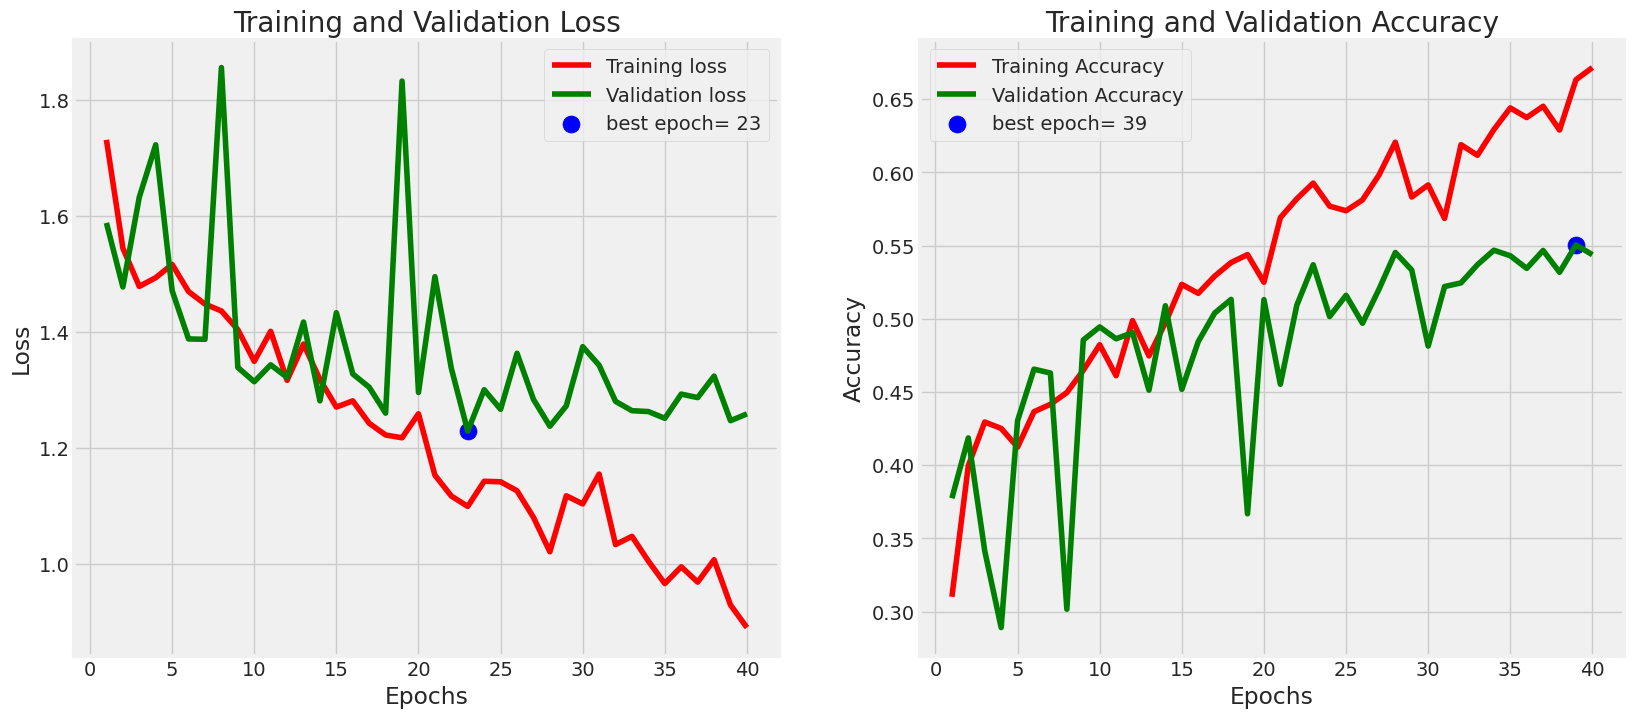

In [ ]:
# Variables
tr_acc = history_ann.history['accuracy']
tr_loss = history_ann.history['loss']
val_acc = history_ann.history['val_accuracy']
val_loss = history_ann.history['val_loss']
index_loss = np.argmin(val_loss)
val_lowest = val_loss[index_loss]
index_acc = np.argmax(val_acc)
acc_highest = val_acc[index_acc]
Epochs = [i+1 for i in range(len(tr_acc))]
loss_label = f'best epoch= {str(index_loss + 1)}'
acc_label = f'best epoch= {str(index_acc + 1)}'

# Plot training history
plt.figure(figsize= (20, 8))
plt.style.use('fivethirtyeight')

plt.subplot(1, 2, 1)
plt.plot(Epochs, tr_loss, 'r', label= 'Training loss')
plt.plot(Epochs, val_loss, 'g', label= 'Validation loss')
plt.scatter(index_loss + 1, val_lowest, s= 150, c= 'blue', label= loss_label)
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(Epochs, tr_acc, 'r', label= 'Training Accuracy')
plt.plot(Epochs, val_acc, 'g', label= 'Validation Accuracy')
plt.scatter(index_acc + 1 , acc_highest, s= 150, c= 'blue', label= acc_label)
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout
plt.show()

In [ ]:
cnn1_model.save('cnn_model_Anany.h5') # save model

# Data Augmantation

In [22]:
strat = df['label']
train_df,validate_df = train_test_split(df,train_size = 0.80,shuffle = True, random_state = 42, stratify = strat)

In [23]:
batch_size = 64
img_size = (48,48)
channels = 3
img_shape = (img_size[0],img_size[1],channels)

# Create different ImageDataGenerator objects for training and testing/validation sets
train_gen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range = 0.1,
    height_shift_range = 0.1,
    rescale=1./255,
    horizontal_flip=True,
    vertical_flip=True)
valid_gen = ImageDataGenerator(rescale=1./255)


# Specify the directory argument for each set
train_gen = train_gen.flow_from_dataframe(dataframe = train_df, x_col = 'data' ,y_col = 'label', target_size = img_size, class_mode = 'categorical',color_mode = 'grayscale'
                                      , shuffle = True, batch_size = batch_size)
validate_gen = valid_gen.flow_from_dataframe(dataframe = validate_df,x_col = 'data' ,y_col = 'label', target_size = img_size, class_mode = 'categorical',color_mode = 'grayscale',
                                          shuffle = True, batch_size = batch_size)

Found 28709 validated image filenames belonging to 7 classes.
Found 7178 validated image filenames belonging to 7 classes.


# CNN 2

In [32]:
from keras.layers import Input, Conv2D, BatchNormalization, Activation, MaxPooling2D, Add, GlobalAveragePooling2D, Dense
from keras.models import Model

def residual_block(input_tensor, filters, strides=(1, 1), downsample=False):
    shortcut = input_tensor

    # First convolutional layer
    x = Conv2D(filters=filters, kernel_size=(3, 3), strides=strides, padding='same')(input_tensor)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)

    # Second convolutional layer
    x = Conv2D(filters=filters, kernel_size=(3, 3), strides=(1, 1), padding='same')(x)
    x = BatchNormalization()(x)

    # Shortcut connection
    if downsample:
        shortcut = Conv2D(filters=filters, kernel_size=(1, 1), strides=strides, padding='same')(shortcut)
        shortcut = BatchNormalization()(shortcut)

    # Add shortcut to main path
    x = Add()([x, shortcut])
    x = Activation('relu')(x)

    return x

def resnet(input_shape, num_classes):
    inputs = Input(shape=input_shape)

    # Initial convolutional layer
    x = Conv2D(filters=64, kernel_size=(7, 7), strides=(2, 2), padding='same')(inputs)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = MaxPooling2D(pool_size=(3, 3), strides=(2, 2), padding='same')(x)

    # Residual blocks
    x = residual_block(x, filters=64, strides=(1, 1), downsample=False)
    x = residual_block(x, filters=64, strides=(1, 1), downsample=False)
    x = residual_block(x, filters=128, strides=(2, 2), downsample=True)
    x = residual_block(x, filters=128, strides=(1, 1), downsample=False)
    x = residual_block(x, filters=256, strides=(2, 2), downsample=True)
    x = residual_block(x, filters=256, strides=(1, 1), downsample=False)
    x = residual_block(x, filters=512, strides=(2, 2), downsample=True)
    x = residual_block(x, filters=512, strides=(1, 1), downsample=False)

    # Global average pooling
    x = GlobalAveragePooling2D()(x)

    # Fully connected layer
    x = Dense(units=num_classes, activation='softmax')(x)

    model = Model(inputs=inputs, outputs=x)
    return model

# Configureation
input_shape = (48, 48, 1)  #  input shape
num_classes = 7  # Number of classes "Labels"
model = resnet(input_shape, num_classes)
model.summary()

model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])



Model: "model_4"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_7 (InputLayer)        [(None, 48, 48, 1)]          0         []                            
                                                                                                  
 conv2d_102 (Conv2D)         (None, 24, 24, 64)           3200      ['input_7[0][0]']             
                                                                                                  
 batch_normalization_104 (B  (None, 24, 24, 64)           256       ['conv2d_102[0][0]']          
 atchNormalization)                                                                               
                                                                                                  
 activation_85 (Activation)  (None, 24, 24, 64)           0         ['batch_normalization_10

In [33]:
history = model.fit(x= train_gen, epochs = 80 , verbose = 1,validation_data = validate_gen,shuffle = True) #80 epochs

Epoch 1/80
449/449 [==============================] - 47s 74ms/step - loss: 1.7961 - accuracy: 0.2714 - val_loss: 1.9436 - val_accuracy: 0.2145
Epoch 2/80
449/449 [==============================] - 41s 91ms/step - loss: 1.6217 - accuracy: 0.3629 - val_loss: 1.9769 - val_accuracy: 0.2453
Epoch 3/80
449/449 [==============================] - 29s 64ms/step - loss: 1.5005 - accuracy: 0.4168 - val_loss: 1.6909 - val_accuracy: 0.3519
Epoch 4/80
449/449 [==============================] - 29s 64ms/step - loss: 1.4234 - accuracy: 0.4496 - val_loss: 1.4705 - val_accuracy: 0.4218
Epoch 5/80
449/449 [==============================] - 37s 82ms/step - loss: 1.3626 - accuracy: 0.4788 - val_loss: 1.4011 - val_accuracy: 0.4674
Epoch 6/80
449/449 [==============================] - 29s 64ms/step - loss: 1.3250 - accuracy: 0.4927 - val_loss: 1.4921 - val_accuracy: 0.3873
Epoch 7/80
449/449 [==============================] - 31s 70ms/step - loss: 1.2865 - accuracy: 0.5095 - val_loss: 1.4079 - val_accuracy:

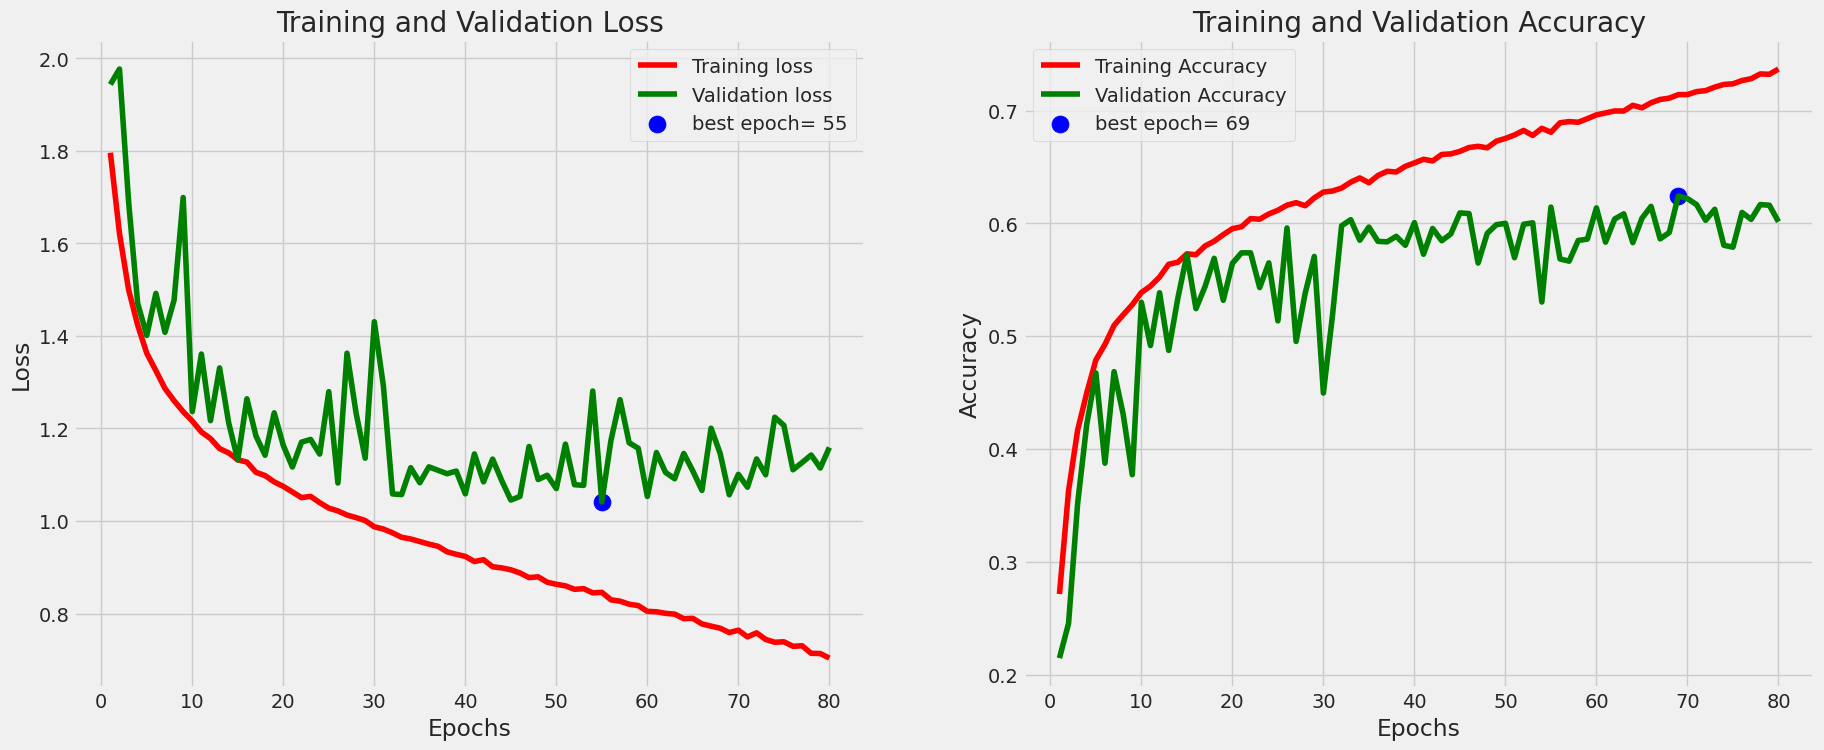

In [34]:
tr_acc = history.history['accuracy']
tr_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']
index_loss = np.argmin(val_loss)
val_lowest = val_loss[index_loss]
index_acc = np.argmax(val_acc)
acc_highest = val_acc[index_acc]
Epochs = [i+1 for i in range(len(tr_acc))]
loss_label = f'best epoch= {str(index_loss + 1)}'
acc_label = f'best epoch= {str(index_acc + 1)}'

plt.figure(figsize= (20, 8))
plt.style.use('fivethirtyeight')

plt.subplot(1, 2, 1)
plt.plot(Epochs, tr_loss, 'r', label= 'Training loss')
plt.plot(Epochs, val_loss, 'g', label= 'Validation loss')
plt.scatter(index_loss + 1, val_lowest, s= 150, c= 'blue', label= loss_label)
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(Epochs, tr_acc, 'r', label= 'Training Accuracy')
plt.plot(Epochs, val_acc, 'g', label= 'Validation Accuracy')
plt.scatter(index_acc + 1 , acc_highest, s= 150, c= 'blue', label= acc_label)
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout
plt.show()

In [35]:
model.save('model_Deep By Omar.h5')

# Testing the models

In [36]:

# Functions to help introduce the pictures to the Models we had created, returns the processed picture (what the Model saw) and the prediction as a "String"
def predict_image_class(image_path, model):
    img = image.load_img(image_path, color_mode="grayscale", target_size=(48, 48))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    predictions = model.predict(img_array)
    predicted_class = np.argmax(predictions[0])
    emoji = ["angry", "disgust" , "fear", "happy" , "neutral" , "sad" ,"surpise"]
    return emoji[predicted_class-1],img_array[0]

# Custom made to make the picture compatiable with the input layer

def predict_image_class2(image_path, model):
    img = image.load_img(image_path, color_mode="rgb", target_size=(48, 48))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0
    predictions = model.predict(img_array)
    predicted_class_index = np.argmax(predictions[0])
    emoji = ["angry", "disgust", "fear", "happy", "neutral", "sad", "surprise"]
    predicted_class = emoji[predicted_class_index]
    return predicted_class, img_array[0]


  # Model 3

Enter the path to the image: im72.png
1/1 [==============================] - 1s 602ms/step


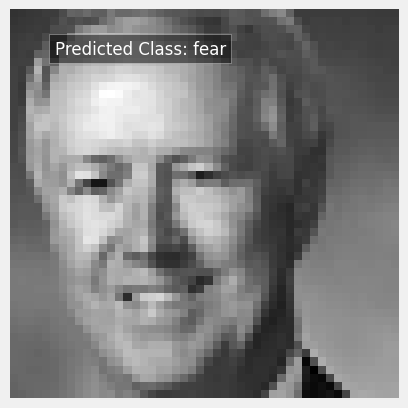

In [39]:
model = tf.keras.models.load_model('facial_recognition_model.h5') # By Malak

image_path = input("Enter the path to the image: ")

predicted_class, img_array = predict_image_class(image_path, model)

# Prints the Image and labels it with the prediction made by the Model
plt.imshow(img_array.squeeze(), cmap='gray')
plt.axis('off')
plt.text(5, 5, f'Predicted Class: {predicted_class}', fontsize=12, color='white', bbox=dict(facecolor='black', alpha=0.5))
plt.show()

#Model 2

Enter the path to the image: im72.png
1/1 [==============================] - 1s 806ms/step


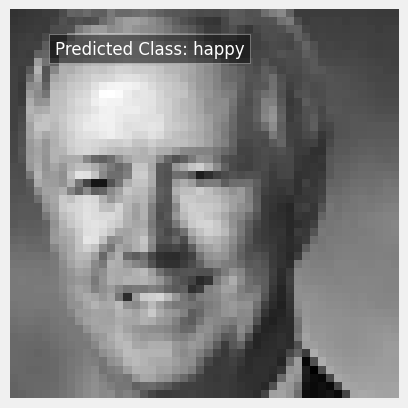

In [41]:
model = tf.keras.models.load_model('model_Deep By Omar.h5') # By Omar

image_path = input("Enter the path to the image: ")

predicted_class, img_array = predict_image_class(image_path, model)

plt.imshow(img_array.squeeze(), cmap='gray')
plt.axis('off')
plt.text(5, 5, f'Predicted Class: {predicted_class}', fontsize=12, color='white', bbox=dict(facecolor='black', alpha=0.5))
plt.show()

#Model 1

Enter the path to the image: im72.png
1/1 [==============================] - 0s 170ms/step


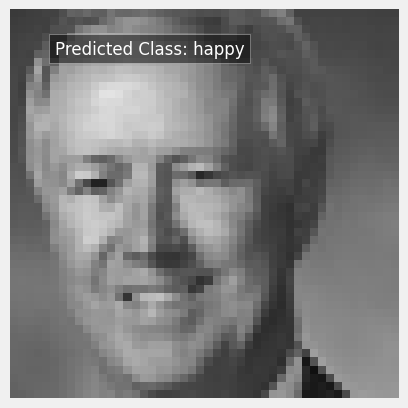

In [42]:
model = tf.keras.models.load_model("cnn_model_Anany.h5") # By Mahmoud


image_path = input("Enter the path to the image: ")

predicted_class, img_array = predict_image_class2(image_path, model)

plt.imshow(img_array.squeeze(), cmap='gray')
plt.axis('off')
plt.text(5, 5, f'Predicted Class: {predicted_class}', fontsize=12, color='white', bbox=dict(facecolor='black', alpha=0.5))
plt.show()